# 機械学習　第８章　実習問題（回帰）

## 問題文に従って各問題ごとにセルを複数追加してプログラムを実装してください。

## ※ 準備作業
### ▶ 以下を実施してください。

In [ ]:
# ドライブのマウント
# ディレクトリの作成
# ディレクトリへの移動
# house_rent.csv のアップロード

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
mkdir data

In [ ]:
cd data

/content/data


## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=85d6451b01ddfd4b32a76c3d35b3822252e5b441394e505da66aa0c58ab52f4b
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


## データ分析対象データ

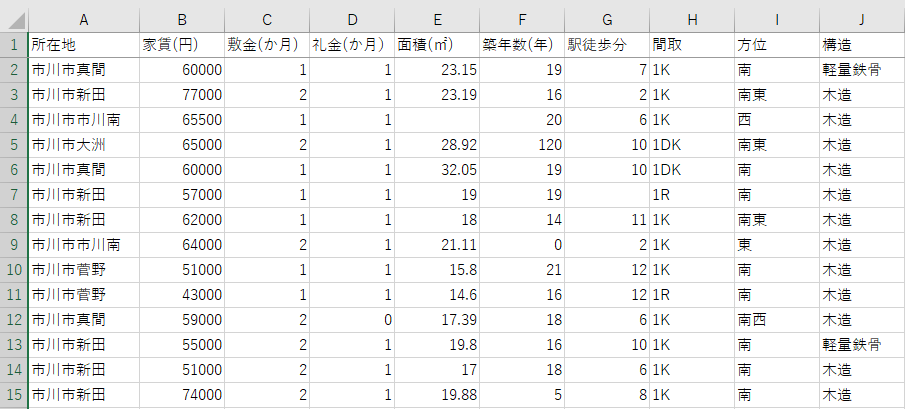

### ■ 正解データ　：　家賃（円）
### ■ 特徴量候補　：　所在地、敷金（か月）、礼金（か月）、面積（㎡）、築年数（年）、駅徒歩、間取、方位、構造

## 問題１　本データのデータ分析において使用する各種ライブラリをインポートしてください。
## また、グラフ表示が同一タブ上に表示されるようにしてください。

In [ ]:
import pandas as pd
import japanize_matplotlib
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 問題２　CSVファイル house_rent.csv を読み込んでください。ただし、エンコーディングは cp932 を使用してください。

In [ ]:
df = pd.read_csv('house_rent.csv', encoding = 'cp932')

## 問題３　読み込んだCSVファイルの先頭５行と末尾５行を表示してください。

In [ ]:
df.head(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造


In [ ]:
df.tail(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
299,市川市新田,64000,2,1.0,22.01,NaN,5.0,1R,南,木造
300,市川市新田,52000,1,0.0,18.02,25.0,13.0,1K,南東,軽量鉄骨
301,市川市新田,57000,1,1.0,21.70,20.0,10.0,1K,南,木造
302,市川市真間,60000,1,1.0,20.37,13.0,14.0,1K,西,鉄骨造
303,市川市新田,72000,2,1.0,20.70,0.0,2.0,1K,東,鉄骨造


## 問題４　質的データの列をすべて挙げてください。つぎに、それらの列にデータが何種類あるかを調べて表示してください。

In [ ]:
col = ['所在地','間取','方位','構造']
df['所在地'].value_counts()

市川市新田     104
市川市市川南     74
市川市真間      42
市川市大洲      30
市川市市川      26
市川市菅野      20
市川市須和田      3
市川市平田       3
市川市大町       1
市川市大和田      1
Name: 所在地, dtype: int64

In [ ]:
df['間取'].value_counts()

1K     229
1R      44
1DK     31
Name: 間取, dtype: int64

In [ ]:
df['方位'].value_counts()

南     167
南東     48
東      30
西      26
南西     26
北東      4
北       3
Name: 方位, dtype: int64

In [ ]:
df['構造'].value_counts()

木造      249
軽量鉄骨     44
鉄骨造      10
Name: 構造, dtype: int64

## 問題５　質的データをすべてダミー化してデータ分析させるデータフレームを作成して下さい。次に、作成したデータフレームの先頭５行を表示してください。

In [ ]:
dummy = pd.get_dummies(df[col], drop_first= True)
df2 = pd.concat([df, dummy], axis = 1)
df2 = df2.drop(['所在地','間取','方位','構造'], axis = 1)
df2.head(5)

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1K,間取_1R,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_軽量鉄骨,構造_鉄骨造
0,60000,1,1.0,23.15,19.0,7.0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,77000,2,1.0,23.19,16.0,2.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,65500,1,1.0,NaN,20.0,6.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,65000,2,1.0,28.92,120.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60000,1,1.0,32.05,19.0,10.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


## 問題６　問題５で作成したデータフレームにおいて、訓練データ、検証データ、テストデータに分割してください。
### ただし、訓練データとテストデータの比率は８：２、乱数シードは０とします。

In [ ]:
train_val, test = train_test_split(df2, test_size = 0.2, random_state = 0)

## 問題７　訓練データにおいて、欠損値を確認して表示し、平均値で穴埋めしてください。欠損値処理した訓練データの先頭５行を表示してください。

In [ ]:
train_val.isnull().sum()

家賃(円)         0
敷金(か月)        0
礼金(か月）        0
面積(㎡)         1
築年数(年)        1
駅徒歩分          1
所在地_市川市大洲     0
所在地_市川市大町     0
所在地_市川市市川     0
所在地_市川市市川南    0
所在地_市川市平田     0
所在地_市川市新田     0
所在地_市川市真間     0
所在地_市川市菅野     0
所在地_市川市須和田    0
間取_1K         0
間取_1R         0
方位_北東         0
方位_南          0
方位_南東         0
方位_南西         0
方位_東          0
方位_西          0
構造_軽量鉄骨       0
構造_鉄骨造        0
dtype: int64

In [ ]:
train_val_mean = train_val.mean()
train_val2 = train_val.fillna(train_val_mean)

train_val2.head(5)

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1K,間取_1R,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_軽量鉄骨,構造_鉄骨造
176,69000,2,1.0,19.87,1.0,2.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
26,70000,2,2.0,31.53,28.0,8.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
74,65000,2,1.0,28.92,12.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
101,51000,1,1.0,20.50,20.0,2.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
154,72000,2,1.0,20.70,0.0,2.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


## 問題８　外れ値処理をしてください。
### ただし、処理過程を説明できるようにセルを構成してください。

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


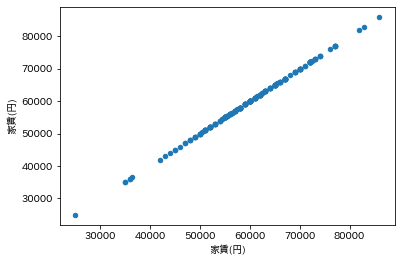

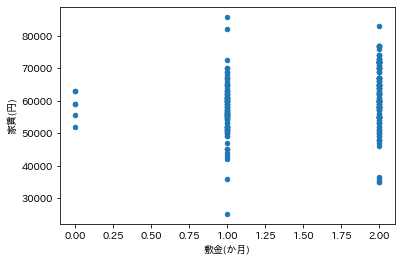

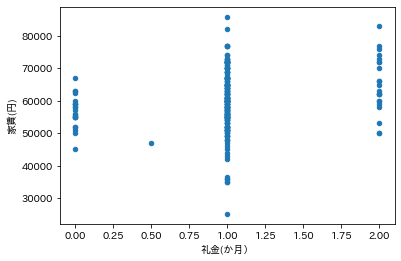

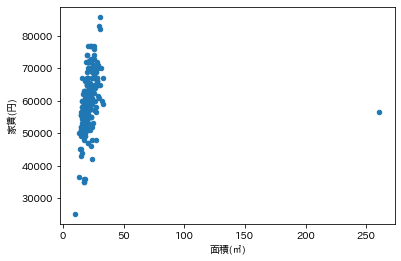

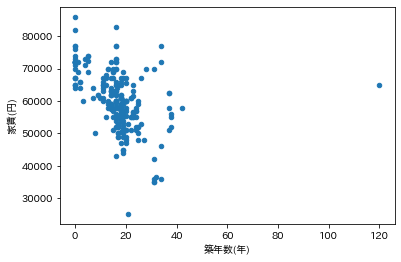

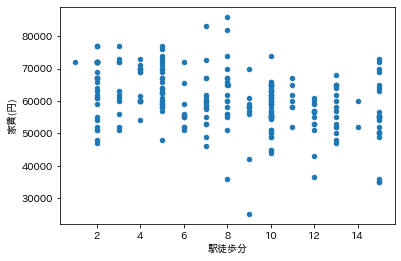

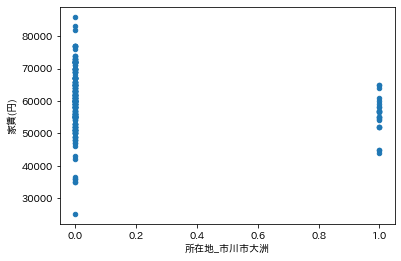

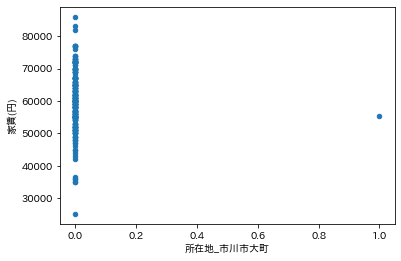

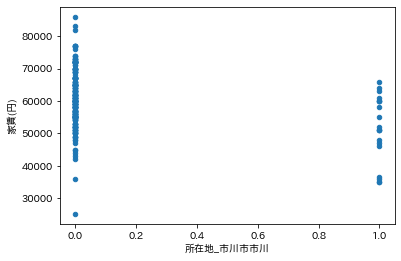

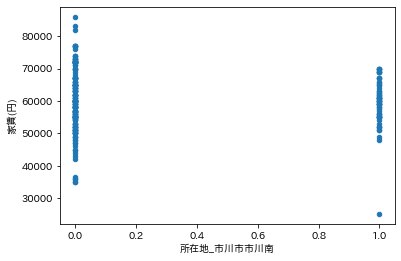

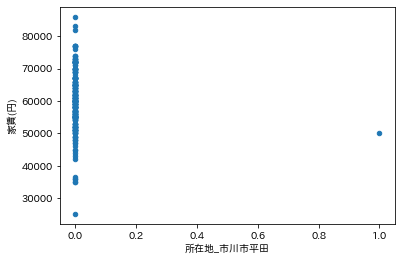

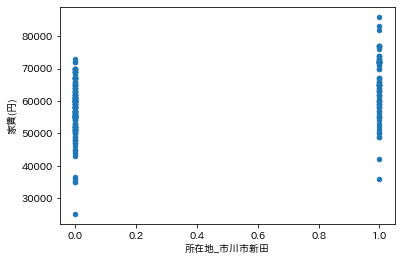

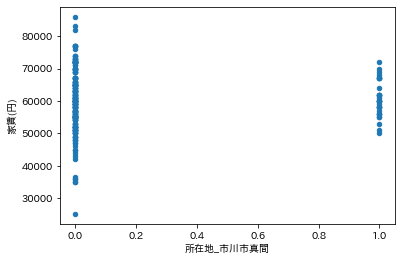

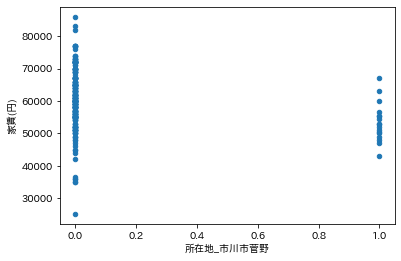

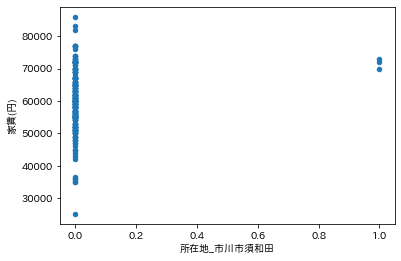

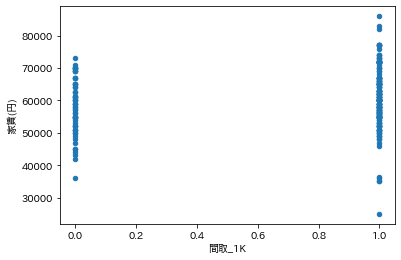

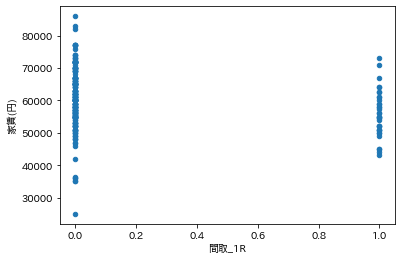

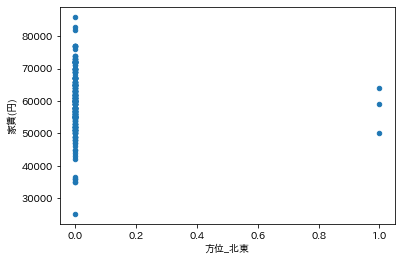

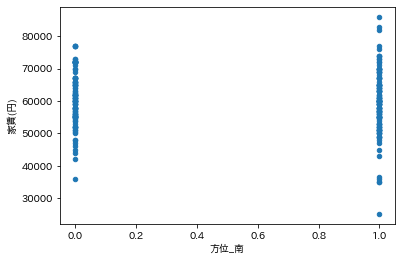

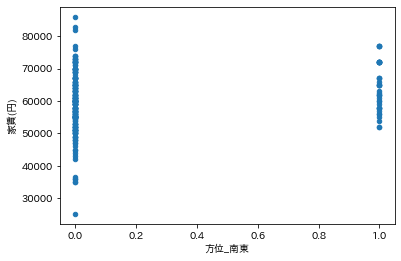

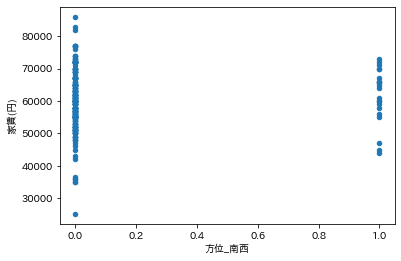

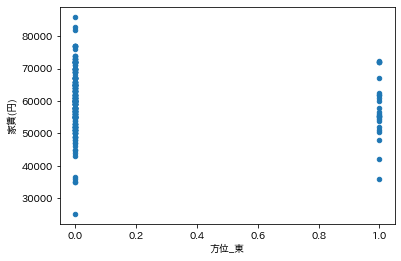

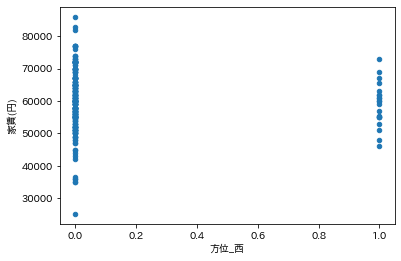

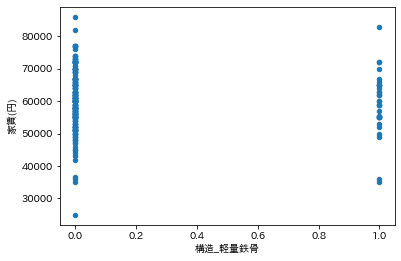

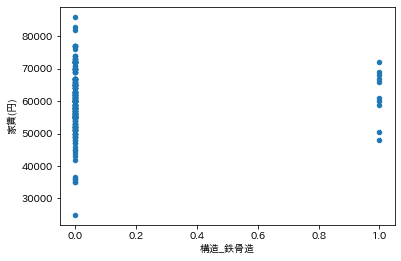

In [ ]:
colname = train_val2.columns
for name in colname:
  train_val2.plot(kind = 'scatter', x = name, y = '家賃(円)')

In [ ]:
#面積と築年数で外れ値を確認
out_line1 = train_val2[(train_val2['面積(㎡)'] > 200)].index
out_line2 = train_val2[(train_val2['築年数(年)'] > 100)].index
print(out_line1, out_line2)

Int64Index([95], dtype='int64') Int64Index([3], dtype='int64')


In [ ]:
train_val3 = train_val2.drop(out_line1, axis=0)
train_val3 = train_val3.drop(out_line2, axis=0)

## 問題９　外れ値処理の結果を表示してください。

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


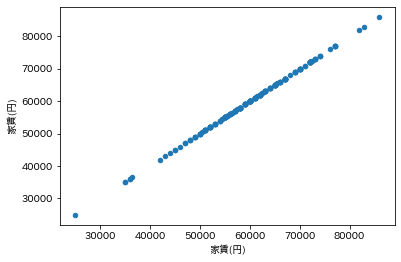

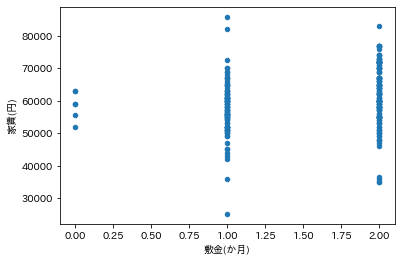

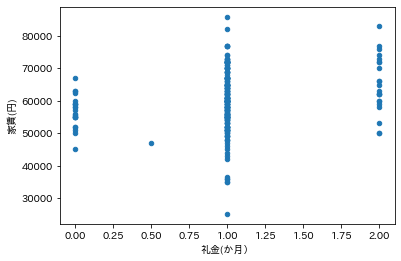

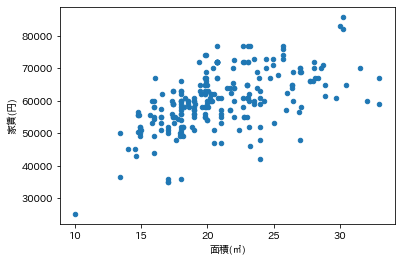

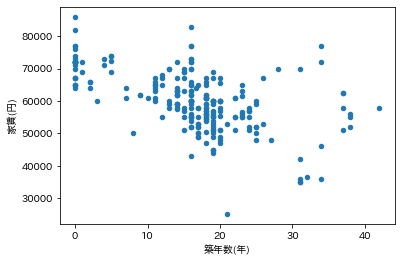

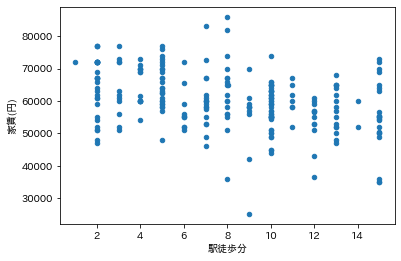

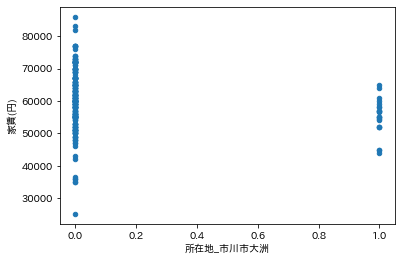

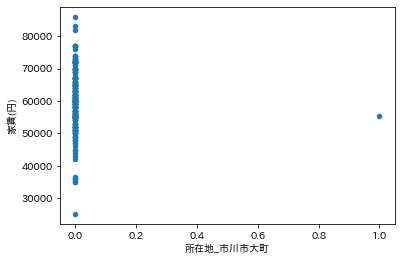

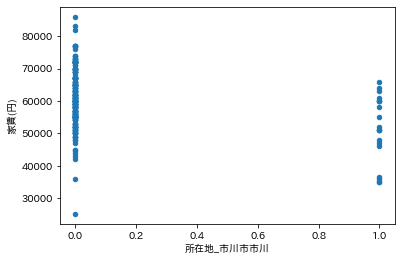

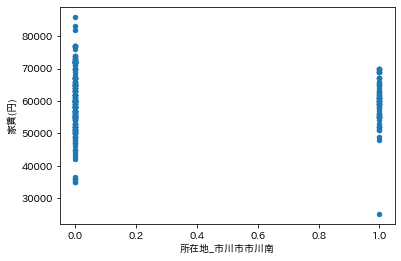

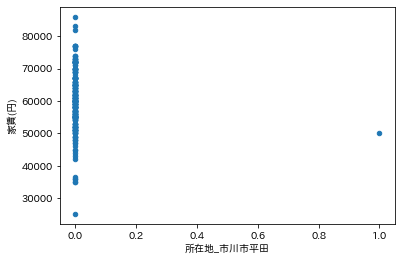

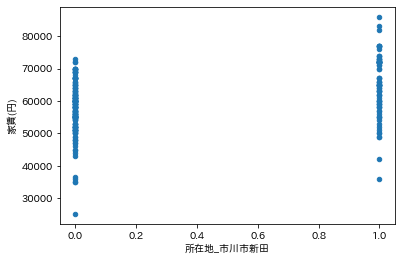

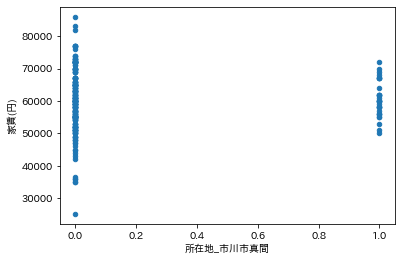

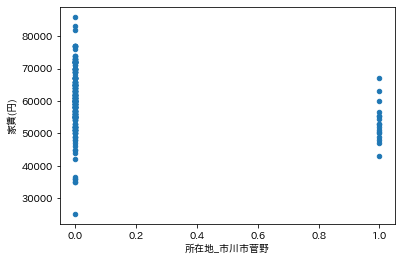

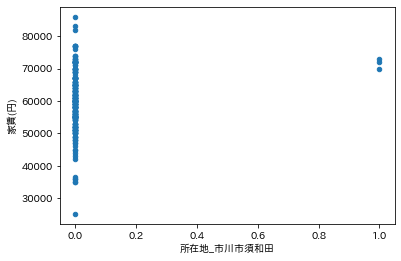

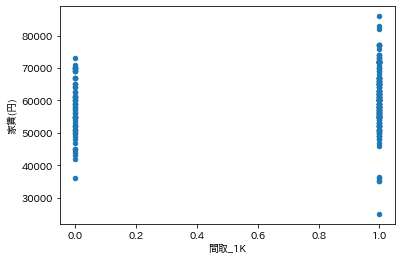

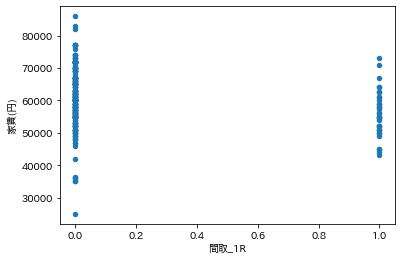

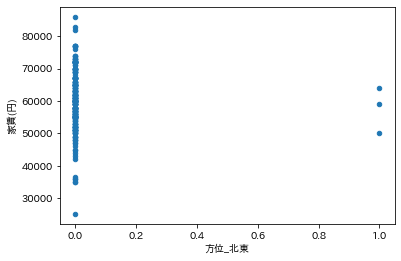

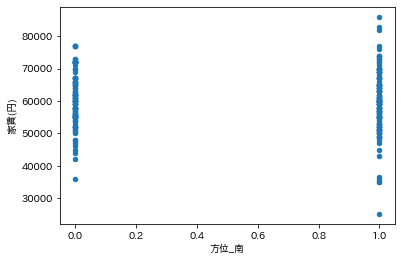

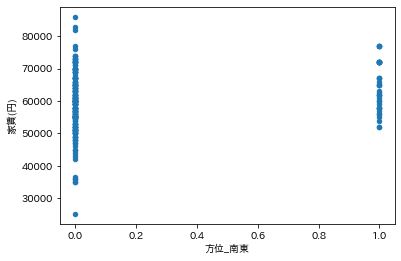

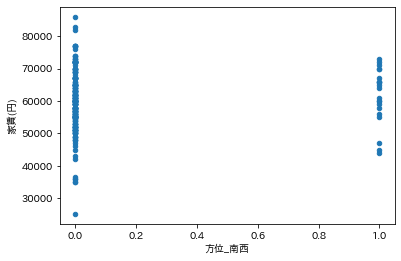

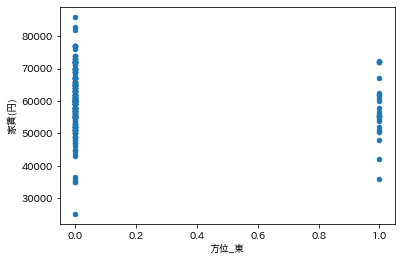

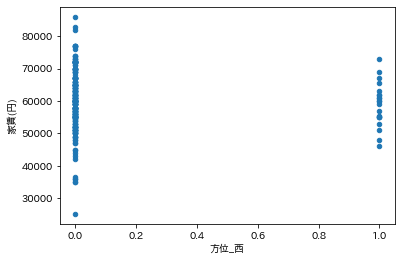

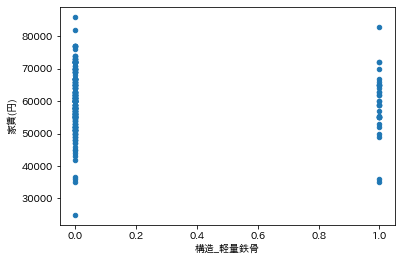

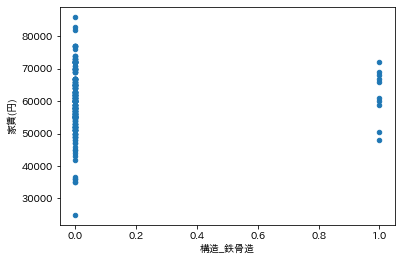

In [ ]:
colname = train_val3.columns
for name in colname:
  train_val3.plot(kind = 'scatter', x = name, y = '家賃(円)')

## 問題１０　正解データと各特徴量の相関関係を説明できるように表示してください。

In [ ]:
train_cor = train_val3.corr()['家賃(円)']
train_cor

家賃(円)         1.000000
敷金(か月)        0.219556
礼金(か月）        0.207592
面積(㎡)         0.554909
築年数(年)       -0.555607
駅徒歩分         -0.366214
所在地_市川市大洲    -0.173506
所在地_市川市大町    -0.033703
所在地_市川市市川    -0.281801
所在地_市川市市川南   -0.037861
所在地_市川市平田    -0.073220
所在地_市川市新田     0.380378
所在地_市川市真間     0.018408
所在地_市川市菅野    -0.206971
所在地_市川市須和田    0.143410
間取_1K         0.142605
間取_1R        -0.194899
方位_北東        -0.031544
方位_南         -0.074658
方位_南東         0.205735
方位_南西         0.050751
方位_東         -0.093566
方位_西         -0.042591
構造_軽量鉄骨      -0.030630
構造_鉄骨造        0.043055
Name: 家賃(円), dtype: float64

In [ ]:
#絶対値に変換
abs_cor = train_cor.map(abs)
abs_cor.sort_values(ascending = False)

家賃(円)         1.000000
築年数(年)        0.555607
面積(㎡)         0.554909
所在地_市川市新田     0.380378
駅徒歩分          0.366214
所在地_市川市市川     0.281801
敷金(か月)        0.219556
礼金(か月）        0.207592
所在地_市川市菅野     0.206971
方位_南東         0.205735
間取_1R         0.194899
所在地_市川市大洲     0.173506
所在地_市川市須和田    0.143410
間取_1K         0.142605
方位_東          0.093566
方位_南          0.074658
所在地_市川市平田     0.073220
方位_南西         0.050751
構造_鉄骨造        0.043055
方位_西          0.042591
所在地_市川市市川南    0.037861
所在地_市川市大町     0.033703
方位_北東         0.031544
構造_軽量鉄骨       0.030630
所在地_市川市真間     0.018408
Name: 家賃(円), dtype: float64

## 問題１１　正解データと特徴量を抽出し、それぞれの先頭５行を表示してください。

In [ ]:
col = ['築年数(年)','面積(㎡)']
a1 = train_val3[col]
b2 = train_val3[['家賃(円)']]

a1.head(5)

,築年数(年),面積(㎡)
176,1.0,19.87
26,28.0,31.53
74,12.0,28.92
101,20.0,20.50
154,0.0,20.70


In [ ]:
b2.head(5)

,家賃(円)
176,69000
26,70000
74,65000
101,51000
154,72000


## 問題１２　問題１１で抽出した正解データと特徴量を使用して、訓練データと検証データに分割してください。
### ただし、訓練データと検証データの比率は８：２、乱数シードは０とします。

In [34]:
a2 = train_val3[col]
b2 = train_val3[['家賃(円)']]
a_train,a_val,b_train,b_val = train_test_split(a2,b2,test_size=0.2,random_state=0)

## 問題１３　線形重回帰モデルを使用して学習さて、検証データで決定係数を求めて表示してください。

In [35]:
model = LinearRegression()
model.fit(a_train, b_train)
model.score(a_val, b_val)

0.44903895314186903

## 問題１４　問題１３で学習したモデルを使用して以下のデータを使用して家賃がいくらになるか予測させてください。
### 予測させるデータは以下の通りです。
#### 敷金：１か月
#### 礼金；１か月
#### 面積：３０㎡
#### 築年数：３年
#### 駅徒歩分：１０分
#### 所在地：市川市新田
#### 間取：１DK
#### 方位：南向き
#### 構造：鉄骨造


In [ ]:
testdata = [[3, 30]]
model.predict(testdata)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[77559.15167345]])

## 問題１５　特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにしてください。
### ただし、特徴量エンジニアリングの過程が理解できるようにセルを構成してください。

In [31]:
a1['面積(㎡) 2'] = a1['面積(㎡)'] ** 2
a1.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,築年数(年),面積(㎡),面積(㎡) 2
176,1.0,19.87,394.8169
26,28.0,31.53,994.1409
74,12.0,28.92,836.3664
101,20.0,20.50,420.2500
154,0.0,20.70,428.4900


In [39]:
temp = a1['築年数(年)'] +1
a1['面積(㎡) / 築年数(年)'] = a1['面積(㎡)'] / temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 問題１６　チューニング結果を受けて、データの標準化後再学習をしてください。

In [57]:
from sklearn.preprocessing import StandardScaler
#特徴量
sc_model_a = StandardScaler()
sc_model_a.fit(a_train)
#正解データ
sc_model_b = StandardScaler()
sc_model_b.fit(b_train)
#標準化
sc_a = sc_model_a.transform(a_train)
sc_b = sc_model_b.transform(b_train)

model2 = LinearRegression()
model.fit(sc_a, sc_b)

LinearRegression()

## 問題１７　テストデータを使用してモデルを評価してください。
## ただし、決定係数の値が 0.65 以上となるようにしてください。

In [42]:
test2 = test.fillna(train_val.mean())
test2.isnull().sum()

家賃(円)         0
敷金(か月)        0
礼金(か月）        0
面積(㎡)         0
築年数(年)        0
駅徒歩分          0
所在地_市川市大洲     0
所在地_市川市大町     0
所在地_市川市市川     0
所在地_市川市市川南    0
所在地_市川市平田     0
所在地_市川市新田     0
所在地_市川市真間     0
所在地_市川市菅野     0
所在地_市川市須和田    0
間取_1K         0
間取_1R         0
方位_北東         0
方位_南          0
方位_南東         0
方位_南西         0
方位_東          0
方位_西          0
構造_軽量鉄骨       0
構造_鉄骨造        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


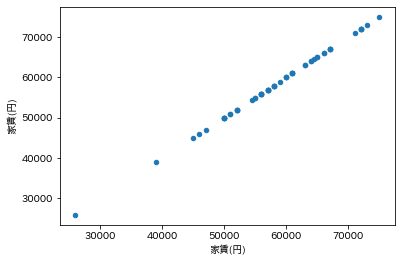

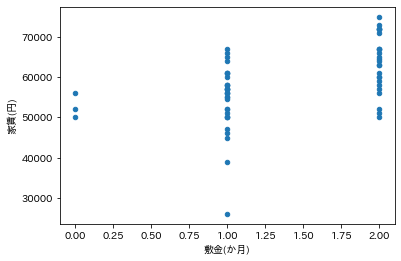

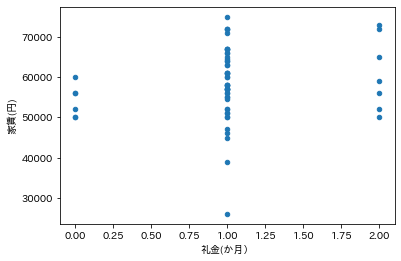

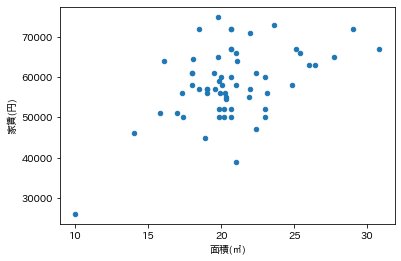

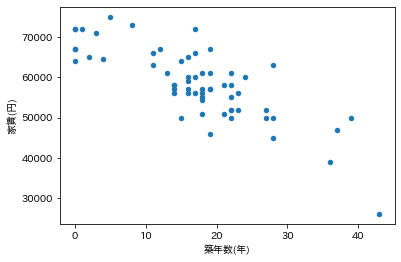

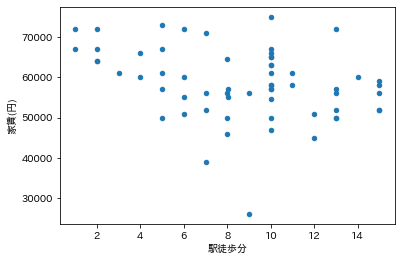

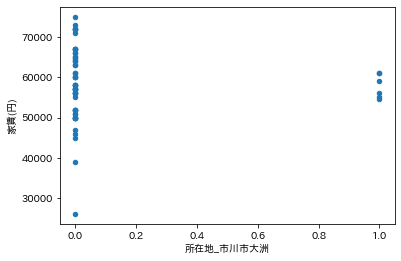

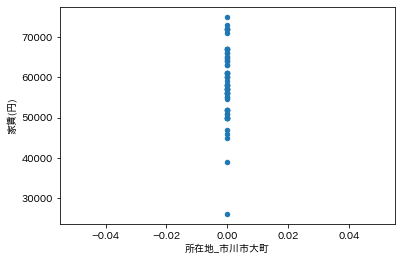

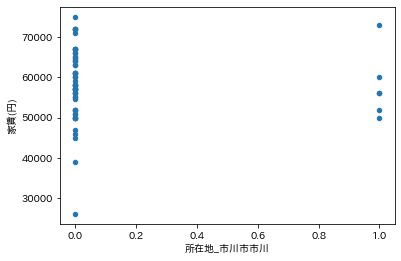

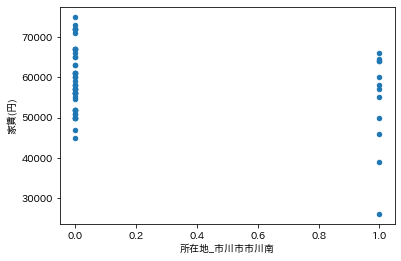

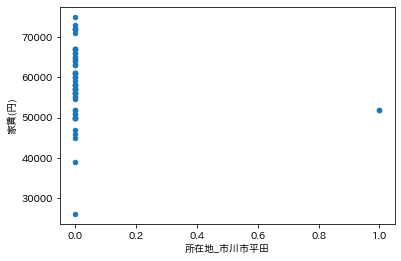

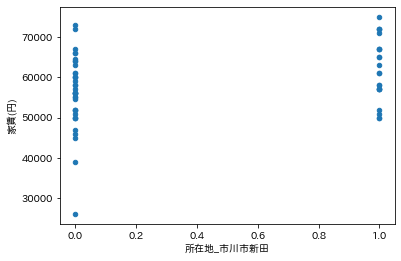

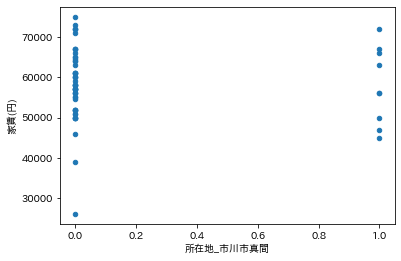

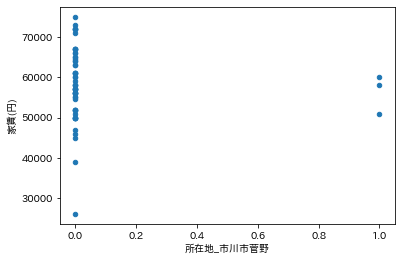

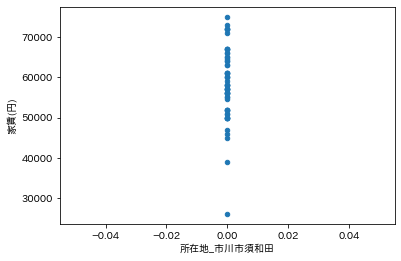

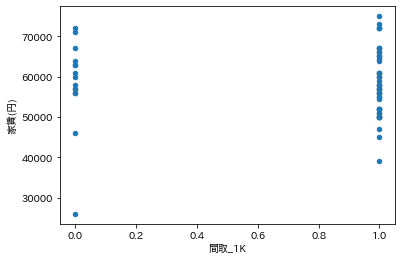

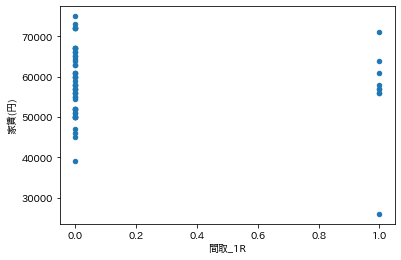

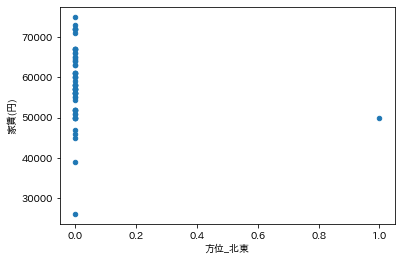

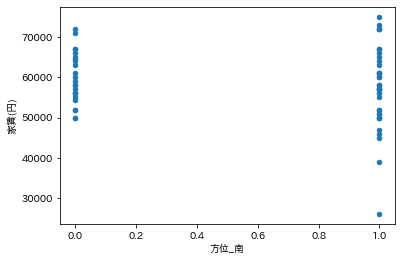

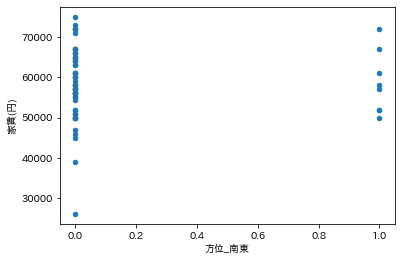

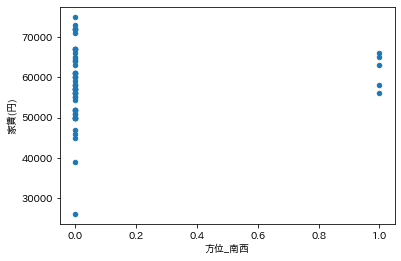

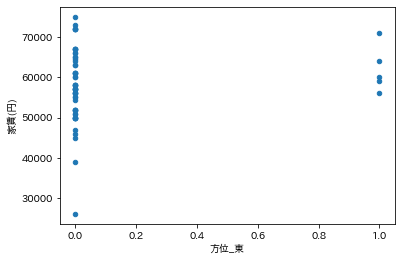

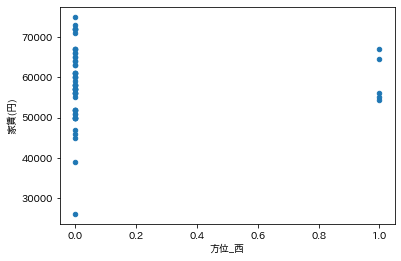

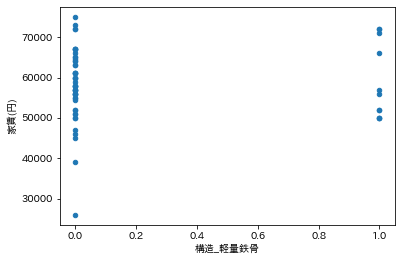

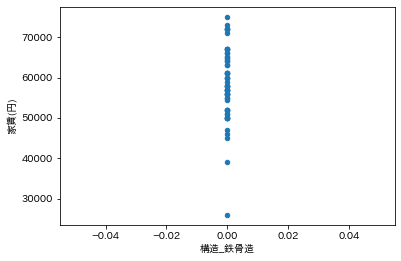

In [44]:
colname = test2.columns
for name in colname:
  test2.plot(kind = 'scatter', x = name, y = '家賃(円)')

In [45]:
#面積(㎡)
out1 = test2[(test2['家賃(円)'] < 30000) & ( test2['面積(㎡)'] < 13)].index
#築年数(年)
out2 = test2[(test2['家賃(円)'] < 30000) & ( test2['築年数(年)'] > 40)].index

print(out1, out2)

Int64Index([229], dtype='int64') Int64Index([229], dtype='int64')


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


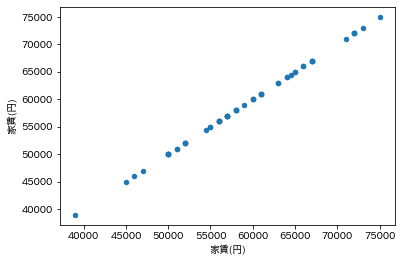

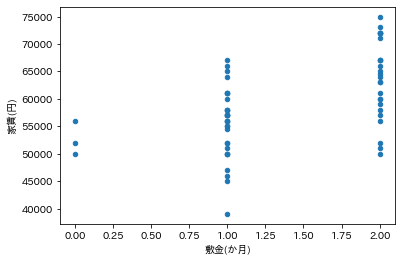

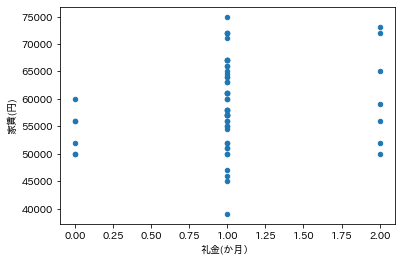

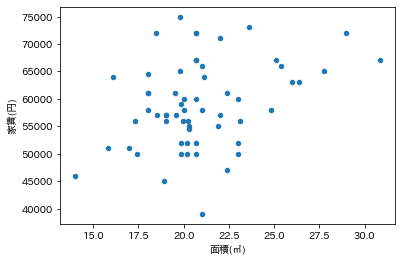

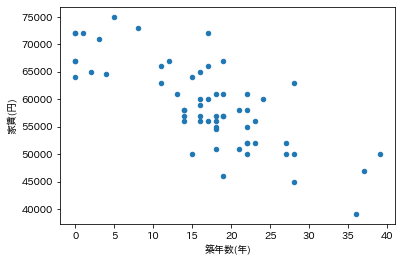

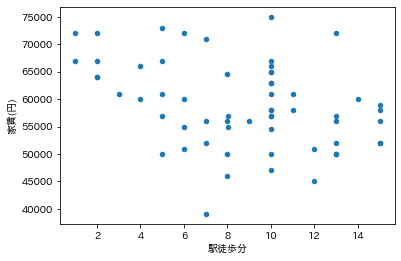

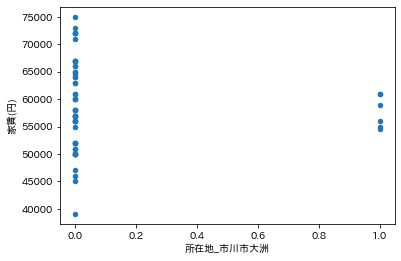

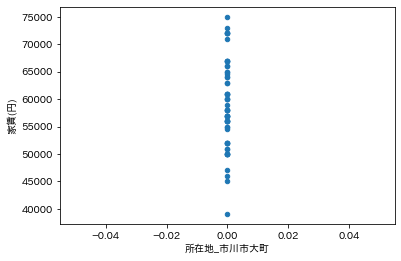

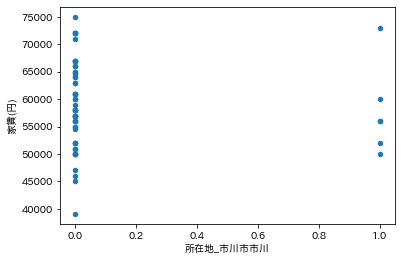

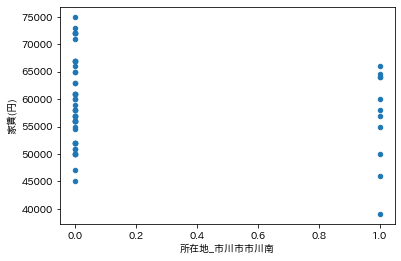

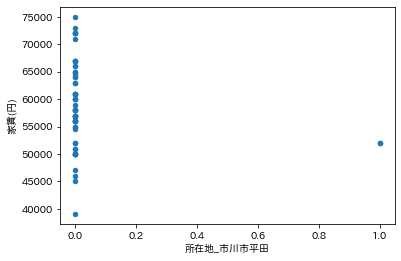

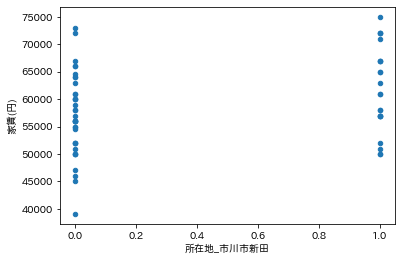

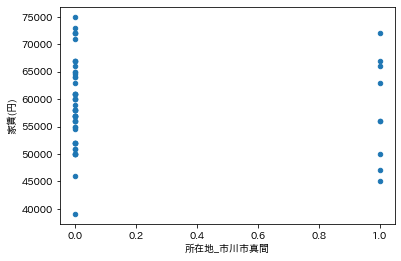

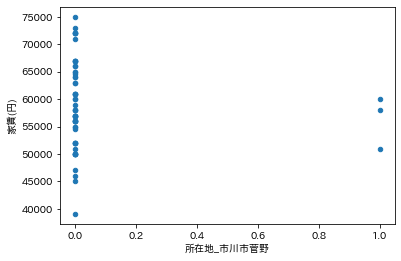

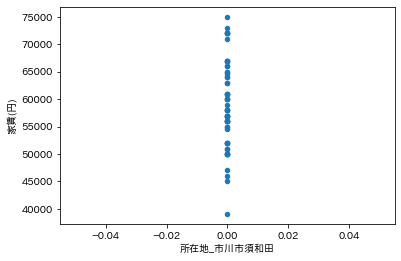

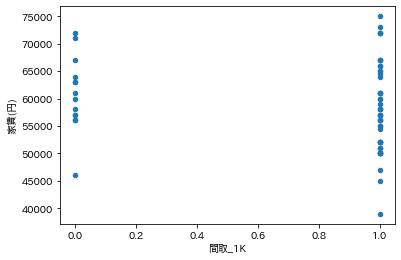

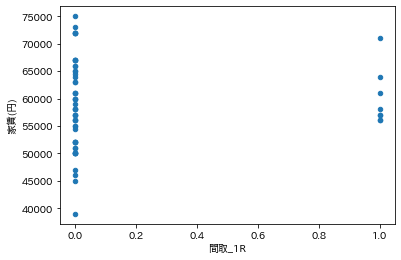

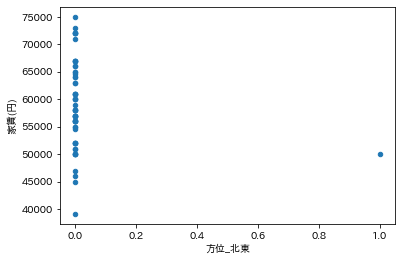

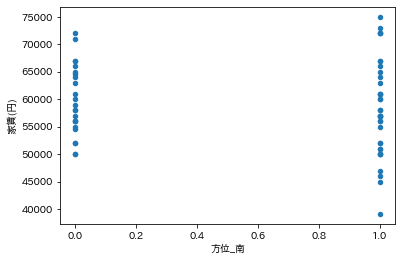

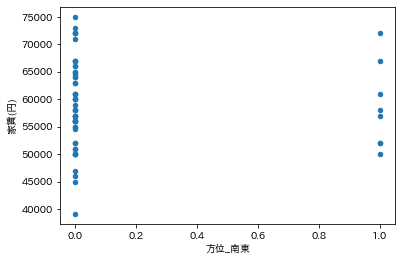

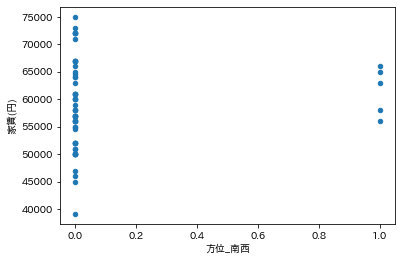

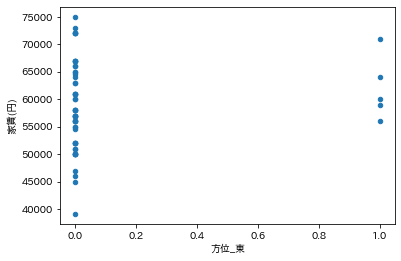

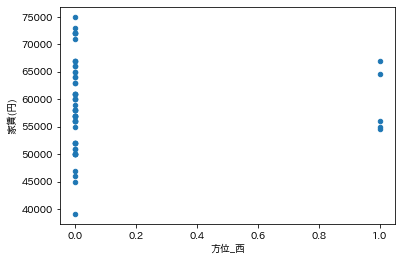

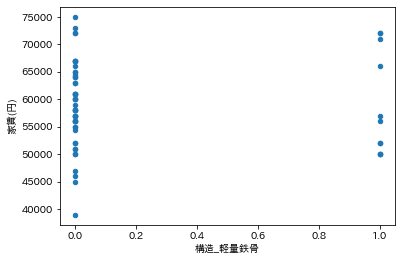

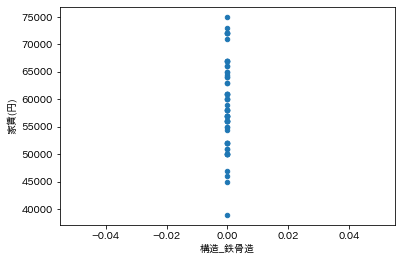

In [46]:
test3 = test2.drop(out1, axis = 0)
colname = test3.columns
for name in colname:
  test3.plot(kind = 'scatter', x = name, y = '家賃(円)')


In [52]:
test_a = test3[col]
test_a.head(5)

,築年数(年),面積(㎡)
66,4.0,18.04
156,16.0,20.00
247,19.0,18.00
267,14.0,20.03
145,22.0,20.66


In [53]:
test_b = test3[['家賃(円)']]
test_b.head(5)

,家賃(円)
66,64500
156,60000
247,61000
267,58000
145,50000


In [49]:
test_a['面積(㎡) 2'] = test_a['面積(㎡)'] ** 2

#0年対応でプラス１
temp = test_a['築年数(年)'] +1
test_a['面積(㎡) / 築年数(年)'] = test_a['面積(㎡)'] / temp

test_a.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,築年数(年),面積(㎡),面積(㎡) 2,面積(㎡) / 築年数(年)
66,4.0,18.04,325.4416,3.608000
156,16.0,20.00,400.0000,1.176471
247,19.0,18.00,324.0000,0.900000
267,14.0,20.03,401.2009,1.335333
145,22.0,20.66,426.8356,0.898261


In [67]:
sc_model_a = StandardScaler()
sc_model_a.fit(test_a)

sc_model_b = StandardScaler()
sc_model_b.fit(test_b)

sc_test_a = sc_model_a.transform(test_a)
sc_test_b = sc_model_b.transform(test_b)

model2 = LinearRegression()
model2.fit(sc_test_a, sc_test_b)

LinearRegression()

In [68]:
model2.score(sc_test_a, sc_test_b)

0.7052977867390219

## 問題１８　モデルとStandardScalerオブジェクトを保存してください。
### ただし、モデルは house_rent.pkl、StandardScalerオブジェクトは house_rent_scx と house_rent_scy とします。

In [69]:
import pickle

with open('house_rent.pkl', 'wb') as f:
  pickle.dump(model2, f)

with open('house_rent_scx', 'wb') as f:
  pickle.dump('sc_model_a', f)

with open('house_rent_scy', 'wb') as f:
  pickle.dump('sc_model_b', f)